### CBECS data: building energy prediction models
#### Author: Anna Vaughan
#### Last modified: 27/2/2020

In [1]:
from helper_functions import *
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

loaded helper functions


In [2]:
# Read in data
PATH_TO_DATASET = "2012_data.csv"
data_heating, data_cooling, target_heating_elec, target_cooling_elec = read_in_hc_data()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:
# Normalise the targets by floorspace
target_heating_norm = target_heating_elec/data_heating['SQFT']
target_cooling_norm = target_cooling_elec/data_cooling['SQFT']

### Model 0: Lasso regression

In [4]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_heating[data_heating['PBA']==2], target_heating_norm[data_heating['PBA']==2], test_size=0.2, random_state=0)

In [6]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)print "training score:", train_score 
print("test score: "+str(test_score))
print("number of features used: "+str(coeff_used))

SyntaxError: invalid syntax (<ipython-input-6-8a9e626311a7>, line 5)

### Model 1: Random forrest regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer


In [105]:
# Let's start with heating
#X_train, X_test, y_train, y_test = train_test_split(data_heating[data_heating['PBA']==2], target_heating_norm[data_heating['PBA']==2], test_size=0.2, random_state=0)

In [106]:
# Select the office buildings
target_heating_norm = target_heating_norm[data_heating['PBA']==2]
data_heating = data_heating[data_heating['PBA']==2]

In [107]:
# Scale the features
sc = StandardScaler()
data_heating = sc.fit_transform(data_heating)
#target_heating_norm = sc.transform(target_heating_norm)

ValueError: Expected 2D array, got 1D array instead:
array=[7.45461000e+00 4.94893617e-01 6.34206329e+00 3.24837333e+00
 2.00421053e+00 3.01891500e+00 4.06145763e+00 1.11202381e-01
 5.00000000e-02 2.42187500e-01 1.51742857e+00 4.09867925e+00
 1.43069565e+01 2.79940141e+00 2.02783333e+00 4.65533333e-01
 4.60000000e-01 3.38882333e+00 6.96000000e-01 6.37850000e+00
 8.83812500e-01 1.77650000e+00 3.80821918e-02 2.68266393e+00
 9.70652381e+00 2.65552632e+00 8.79746939e-01 1.98588235e-01
 9.96586022e-01 6.41604545e+00 2.49652174e-01 6.44489247e-01
 2.67933333e+00 4.22769231e-01 2.50274321e+00 2.86977130e-01
 4.45254321e+00 2.56666667e-02 1.25000000e-01 1.23030303e+00
 3.20355556e-02 3.34467241e+00 2.02000000e-01 8.56989247e-02
 2.06836735e+00 1.95000000e+00 1.14978723e-01 2.75316364e+00
 4.94776471e+00 8.11338033e+00 3.55000000e-02 1.43200667e+00
 2.95934200e+00 1.32949314e+01 9.75178571e-01 4.69583333e+00
 5.59420290e-02 3.81340000e+00 3.34806000e+00 2.72666667e+00
 7.44648936e+00 1.37951220e-01 3.27073973e-01 5.69121951e+00
 9.15462500e-01 2.60248333e-01 2.83868421e-01 2.37866667e+00
 1.16540541e+00 5.77035714e+00 3.40619452e+00 3.84590164e-02
 5.02179487e-02 2.27720930e-01 9.58062500e+00 5.96000000e+00
 4.07658904e+00 3.59288889e-01 6.53332500e+00 6.00000000e-01
 1.44000000e-02 4.30000000e-02 2.21142708e+00 7.40767123e-01
 2.70909091e-02 2.58235294e+00 2.42389333e+00 2.11252750e+00
 1.48916667e+00 5.11315789e-02 2.22662857e+00 7.30000000e-01
 1.01011970e+01 9.40000000e-01 4.58538462e+00 1.42307692e-02
 7.62820000e-02 3.62320000e-01 2.48240000e+00 1.71772152e+00
 1.46658400e+00 5.42731707e-01 2.25200000e-02 2.40999419e+00
 4.13699173e-02 6.24034333e+00 4.66200000e-01 1.14461538e-02
 1.41947316e+00 9.49344828e+00 5.98753623e+00 3.32183333e-01
 2.30073171e+00 8.83095238e-01 2.47867619e+00 7.73000000e-01
 4.86290541e-01 5.34224286e-01 2.33617021e-01 1.57166667e-01
 5.49560000e+00 6.35000000e-01 4.99546667e+00 3.97873077e+00
 4.34968132e+00 3.27310811e-01 2.33625000e+00 5.43544444e-01
 5.13970769e+00 1.70196078e-02 4.74750641e+00 1.35263158e-01
 1.66971429e+00 3.22361538e-01 1.35559623e+00 1.92131313e+00
 4.40000000e-01 2.42162162e-01 4.30274909e+00 7.98037037e+00
 2.91730769e-01 9.38526316e+00 6.68000000e-02 3.02444737e+00
 1.50842105e+00 7.75166667e-02 1.02600000e-01 3.48846154e-01
 1.00924390e+01 3.96052632e-01 5.93346067e-01 8.66911765e-01
 7.66521739e-02 1.52141935e+00 1.20247465e+01 3.98803667e+00
 1.15714286e-01 2.72954545e-01 1.68800000e+00 2.23612000e+00
 6.86765152e+00 1.45000000e+00 1.30549296e-01 1.42066667e+00
 4.16462714e+00 5.00606061e-01 2.64024390e-01 8.09238095e-01
 2.36924713e+00 3.42740741e-01 4.95810021e+00 6.44373737e-01
 1.92967742e-01 8.16507018e+00 1.55891176e+00 8.94414286e-02
 2.07428571e-01 2.55000000e-02 1.72381250e-01 5.09900000e-02
 2.33333333e-02 1.21000000e-01 7.22200000e-01 4.29125957e+00
 1.88886364e+00 1.47640000e+01 4.53454545e-01 1.52903226e-01
 6.14925000e+00 1.14341463e-01 2.69600000e-01 5.08285246e+00
 3.33970000e+00 2.25310000e+01 6.25561616e+00 2.98036702e+00
 8.79462366e-01 1.65563036e+01 8.54038462e-02 6.25266667e+00
 1.06310811e+00 3.94838710e-01 2.25000000e+00 1.33671591e+00
 7.87692308e-02 6.56666667e-01 1.46503415e+00 2.87822174e+00
 6.82968750e+00 1.52320000e+00 3.01996923e+00 4.23923404e+00
 5.98278689e-02 3.90500000e-01 5.53879452e+00 1.93475000e+00
 1.61481481e-02 1.60814815e+00 1.06616162e+00 5.10848485e-01
 5.20666667e+00 8.07750000e-01 1.93043478e-02 9.62121212e-02
 2.12196078e+00 5.24285714e-01 4.86825000e+00 1.00037736e-01
 2.37415000e-01 1.73226000e+00 2.34428000e+00 1.57000000e-01
 1.73570000e+00 9.59830508e-01 1.35330714e+00 6.00888889e-01
 4.79142857e-01 1.50877500e-01 1.09923077e+00 2.99227273e+00
 2.50772727e+00 2.78265000e+00 1.03617021e-01 2.16926966e-01
 2.30833333e-01 1.52083333e-01 1.06711667e+01 5.87706875e+00
 7.82013077e+00 5.07794922e-02 7.46400000e-01 1.08746667e+00
 9.63885181e-01 3.68166667e-01 1.36698413e+00 1.21338889e+01
 3.40260870e-01 1.38478261e-01 4.00813636e+00 1.04029851e-01
 1.18792632e+00 3.48250602e+00 6.77795455e-01 5.89773913e+00
 5.24290909e+00 8.24950000e+00 2.20338983e-03 1.65970149e-02
 6.34960000e+00 2.49912121e+00 7.19000000e-02 4.53000000e-01
 3.50528302e-02 2.31560000e+00 8.61763158e+00 1.33257895e+00
 1.36088364e+00 1.43905882e-01 1.91750000e+00 8.72129730e-01
 2.03800000e-01 3.99949367e+00 5.65277108e+00 4.52748000e+00
 3.77271250e+00 7.17360000e+00 5.77387879e+00 5.43954545e+00
 5.57666667e-01 3.16260000e+00 1.87079333e+00 5.80460000e+00
 1.71723404e+00 2.06746988e-01 5.01888889e-01 9.79775281e-03
 2.47857143e-02 3.93750000e-02 1.46621622e-02 9.18047222e+00
 1.79226022e+01 2.52678571e+00 1.87107692e+00 1.61857429e+00
 3.24750000e+00 6.08600000e+00 1.23897500e+00 4.19868421e-01
 8.89166667e-01 5.63201282e+00 1.30193333e+01 2.07125000e+00
 4.61900000e+00 9.67200000e-02 5.24214286e-01 4.40960000e+00
 8.69230769e-02 1.02338028e+00 2.77079167e+00 4.15501075e+00
 8.57637374e+00 4.91789474e+00 1.01709091e+00 7.04759167e+00
 7.74941176e-01 3.60367826e+00 3.04674375e+00 1.86046875e-01
 4.74881053e+00 2.08200000e+00 2.02659574e-03 1.40000000e-02
 5.06320000e+00 2.38597701e+00 8.56024615e-01 3.08760000e+00
 2.02283857e+00 6.32362162e-01 4.75935484e+00 2.96068966e-01
 3.35920588e+00 4.41333333e-01 7.45912500e+00 2.40301587e+00
 1.75696970e+00 1.59947126e+00 3.05000000e-01 1.82017857e-01
 2.17777778e-01 7.14228571e+00 5.35866429e-01 1.05932759e+01
 1.14044444e+00 3.10625000e-01 9.14650000e+00 1.15250000e-01
 2.71736364e+00 7.58400000e-02 3.59416667e-01 3.34082857e-01
 9.09680000e-01 5.46065333e+00 5.00000000e+00 9.73887429e+00
 6.40521739e+00 7.56666667e-02 1.15292143e+00 5.01960784e-02
 4.20686076e+00 2.24901639e+00 3.02881731e+00 2.52471429e+00
 6.43302381e+00 6.40823529e-02 3.25366667e+00 5.93589500e+00
 1.23747917e+00 7.30636364e+00 4.45714286e-02 9.62625000e+00
 2.80000000e-01 3.22642105e+00 1.40151546e+00 5.11924051e-01
 4.27586207e-02 2.93636620e+00 8.19672131e-03 6.52457895e-01
 3.72629474e+00 4.67526882e-01 3.74727273e-01 5.45967742e-02
 3.46666667e-03 8.21458333e-01 2.19493333e+00 1.96894237e+00
 1.19180819e+00 6.06171429e-02 1.21181818e+00 8.10774528e+00
 8.06372000e+00 1.55792000e+00 4.04545455e-02 1.57614035e+00
 1.02786517e+00 2.46021569e+00 1.57240000e+00 1.52857143e-01
 3.34676923e+00 5.35833333e-01 4.72386207e+00 5.96000000e-03
 1.58682340e+00 4.14090909e-01 3.80000000e-02 8.33333333e-01
 2.37185185e-01 1.13578313e+00 1.00843750e-01 6.70309278e-01
 2.06040541e-01 1.09068966e-02 6.78160920e-02 8.52647887e-01
 5.76723277e+00 9.20200000e+00 7.82522435e-01 8.31000000e-01
 1.23783908e+00 7.73250000e-01 1.20260959e+00 2.86400847e+00
 2.44480978e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [108]:
def rmse_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared = False)

my_scorer = make_scorer(rmse_loss)

In [121]:
# Grid search for the best model
unique_depths = [3, 7, 12]
unique_n_estimators = [5, 10, 30, 50, 100]

regressor = RandomForestRegressor()
gsCV = GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': unique_depths, 'n_estimators': unique_n_estimators}, 
                   scoring = my_scorer)
gsCV.fit(data_heating, target_heating_norm)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

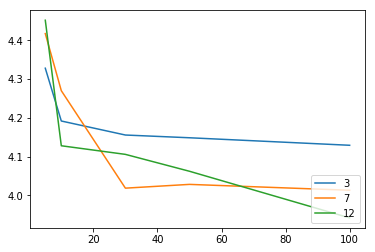

In [122]:
depths = gsCV.cv_results_['param_max_depth']
n_estimators = gsCV.cv_results_['param_n_estimators']
scores = gsCV.cv_results_['mean_test_score']

for depth in unique_depths:
    depth_constant_scores = scores[depths == depth]
    plt.plot(unique_n_estimators, depth_constant_scores, label = depth)

plt.legend(loc = "lower right")
plt.show()